In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [86]:
dataset=pd.read_csv('/content/drive/My Drive/moviereviews.csv')
dataset.head(10)

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...
5,neg,"to put it bluntly , ed wood would have been pr..."
6,neg,"synopsis : melissa , a mentally-disturbed woma..."
7,neg,tim robbins and martin lawernce team up in thi...
8,neg,"in "" gia "" , angelina jolie plays the titular ..."
9,neg,"in 1990 , the surprise success an unheralded l..."


In [87]:
dataset.shape

(2000, 2)

In [88]:
#Checking for null values in all columns
dataset.isnull().sum()

label      0
review    35
dtype: int64

In [0]:
#Dropping the missing values
dataset.dropna(inplace=True)

In [0]:
import string 
from bs4 import BeautifulSoup

def remove_punctuation(text):

  #Removing HTML tags
  bs = BeautifulSoup(text, "html.parser")
  removed_html = bs.get_text(separator=" ")

  no_punct = ''.join([c.lower() for c in text if c not in string.punctuation])
  return no_punct


dataset["review"] = dataset["review"].apply(lambda x: remove_punctuation(x))


In [0]:
#Removing Numbers
dataset['review'] = dataset['review'].str.replace(r'\d+','')

In [0]:
#Dividing the dataset into X and Y
X=dataset.iloc[:, [1]]
Y=dataset.iloc[:, [0]]

In [93]:
#Encoding values in "Y"
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [94]:
#Using TfVectorizer, removing stopwords and converting back to a DataFrame
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(stop_words=set(stopwords.words('english')))

tf_dataset=tf.fit_transform(X['review']).toarray()
print(tf_dataset)

X_tf = pd.DataFrame(tf_dataset)

X_tf.columns = tf.get_feature_names()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [95]:
X_tf.head()

,aa,aaa,aaaaaaaaah,aaaaaaaahhhh,aaaaaah,aaaahhhs,aahs,aaliyah,aaliyahs,aalyah,aalyahs,aameetings,aamir,aardman,aaron,aatish,ab,aback,abandon,abandoned,abandoning,abandonment,abandons,abating,abba,abbe,abberation,abberline,abbots,abbott,abbotts,abbreviated,abby,abbys,abc,abcs,abdomen,abducted,abductees,abduction,...,zombie,zombielike,zombies,zombiestomping,zombified,zone,zones,zoo,zookeeper,zookeepers,zoolander,zoolanders,zoolike,zoologist,zoom,zooming,zoomins,zoomout,zoomouts,zooms,zoot,zophres,zorg,zorro,zorros,zs,zsigmond,zucker,zuckerabrahamszucker,zuehlke,zuko,zukovsky,zulu,zundel,zurgs,zweibel,zwick,zwicks,zwigoffs,zycie
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

In [0]:
#Splitting the dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X_tf, Y, test_size=0.25, random_state=0)

In [0]:
# Applying Grid Search for RandomForestClassifier to find the best model and the best parameters
classifier_RFC = RandomForestClassifier()
parameters_RFC = {'criterion': ["gini","entropy"], 
                  'n_estimators': [150, 175, 200, 225, 250, 275, 300, 325, 350],
                  'max_depth': [None]}

grid_search_RFC = GridSearchCV(classifier_RFC, 
                               parameters_RFC, cv = 5, 
                               scoring='accuracy')

grid_search_RFC_fit = grid_search_RFC.fit(X_train, Y_train)
best_accuracy_RFC = grid_search_RFC_fit.best_score_
best_parameters_RFC = grid_search_RFC_fit.best_params_

In [0]:
# Applying Grid Search for KNN to find the best model and the best parameters
classifier_KNN=KNeighborsClassifier()

parameters_KNN = [{'n_neighbors': [5, 10, 20, 50, 100, 125, 175], 'weights': ['uniform', 'distance']}]

grid_search_KNN = GridSearchCV(estimator = classifier_KNN,
                           param_grid = parameters_KNN,
                           cv = 5)

grid_search_KNN = grid_search_KNN.fit(X_train, Y_train)
best_accuracy_KNN = grid_search_KNN.best_score_
best_parameters_KNN = grid_search_KNN.best_params_


In [106]:
print("The highest accuracy for Random Forest achieved is:", best_accuracy_RFC, "and the parameters used are:", best_parameters_RFC)

print("The highest accuracy for KNN achieved is:", best_accuracy_KNN, "and the parameters used are:", best_parameters_KNN)

The highest accuracy for Random Forest achieved is: 0.8037610976594027 and the parameters used are: {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 250}
The highest accuracy for KNN achieved is: 0.7650916637841576 and the parameters used are: {'n_neighbors': 125, 'weights': 'distance'}


In [0]:
#Fitting and predicting the model for Random Forest
classifier_RFC = RandomForestClassifier(criterion='entropy', max_depth=None, n_estimators=350)
classifier_RFC.fit(X_train, Y_train)
Y_pred_RFC = classifier_RFC.predict(X_test)

In [118]:
#Confusion Matrix and Accuracy Score for Random Forest
cm_RFC = confusion_matrix(Y_test, Y_pred_RFC)
ac_RFC = accuracy_score(Y_test, Y_pred_RFC)

print("Accuracy score for RFC is: ", ac_RFC)
print(cm_RFC)

Accuracy score for RFC is:  0.8211382113821138
[[206  37]
 [ 51 198]]


In [0]:
#Fitting and predicting the model for KNN
classifier_KNN = KNeighborsClassifier(n_neighbors=175, weights='distance')
classifier_KNN.fit(X_train, Y_train)
Y_pred_KNN = classifier_KNN.predict(X_test)

In [120]:
#Confusion Matrix and Accuracy Score for KNN
cm_KNN = confusion_matrix(Y_test, Y_pred_KNN)
ac_KNN = accuracy_score(Y_test, Y_pred_KNN)

print("Accuracy score for KNN is: ", ac_KNN)
print(cm_KNN)

Accuracy score for KNN is:  0.7642276422764228
[[168  75]
 [ 41 208]]


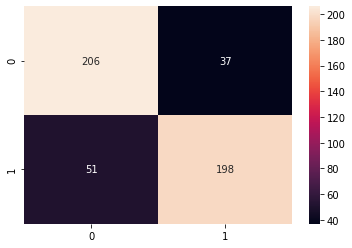

In [121]:
#Visualisation for confusion matrix - Random Forest
import seaborn as sns
sns.heatmap(cm_RFC, annot=True, fmt='g')

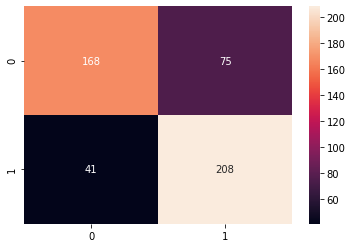

In [122]:
#Visualisation for confusion matrix - KNN
import seaborn as sns
sns.heatmap(cm_KNN, annot=True, fmt='g')